In [1]:
import csv
import pprint
import matplotlib.pyplot as plt

def list_up_p(path):
    p_list = []
    with open(path) as f:
        reader = csv.reader(f)
        for row in reader:
            p_list.append(float(row[0]))
    return p_list
        
def show_hist(p_list): 
    plt.hist(p_list)
    plt.ylabel('frequent')
    plt.xlabel('selective_p')
    plt.show()

In [2]:
from scipy.stats import stats

def KS(p_list):
    print("KS検定結果: {}".format(stats.kstest(p_list, "uniform").pvalue))

In [3]:
def TRP(p_list):
    count = 0
    for p in p_list:
        if p < 0.05 :
            count += 1
    
    trp = count/len(p_list)
    return trp

In [4]:
def show_plot(trp_list, text, y_label):
    for i, list in enumerate(trp_list):
        plt.plot(list, label = text.format(i+1))
    plt.xlabel("delta mu")
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

平均差: 0, シグマ領域1, 検定回数400


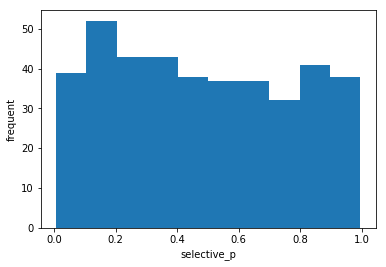

KS検定結果: 0.22972344434969827


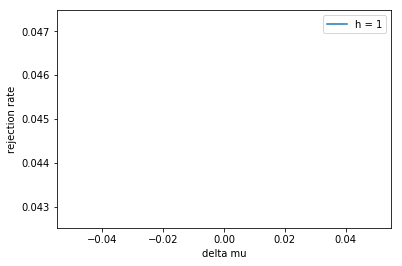

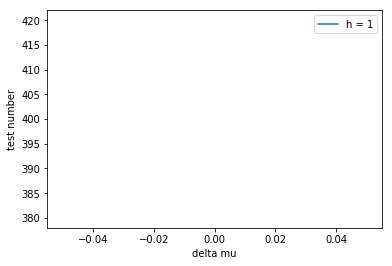

In [30]:
path = '/Users/oomoriyumehiro/lab/Seminar/mss-python/CSV/selective-p.csv'

trp_mat = []
test_mat = []

for i in range(1):
    trp_list = []
    test_list = []
    
    for j in range(1):
        delta_mu = j
        sigma_conf = i + 1
#         path = '/Users/oomoriyumehiro/lab/Seminar/mss-python/CSV/size_max2/TPR/sigma1_size64_n5/result{0}_{1}.csv'.format(delta_mu, sigma_conf)
        p_list = list_up_p(path)
        print("平均差: {0}, シグマ領域{1}, 検定回数{2}".format(delta_mu, sigma_conf, len(p_list)))
        show_hist(p_list)
        KS(p_list)
        trp = TRP(p_list)
        test = len(p_list)
        trp_list.append(trp)
        test_list.append(test)
        
#         show_hist(p_list)
    trp_mat.append(trp_list)
    test_mat.append(test_list)
show_plot(trp_mat, "h = {}", "rejection rate")
show_plot(test_mat, "h = {}", "test number")

In [27]:
import numpy as np

def area_num(result):
    area_value_list = []
    count_list = []
    for index, value in enumerate(result):
        if value not in area_value_list:
            area_value_list.append(value)
            count_list.append(0)
        area_num = area_value_list.index(value)
        count_list[area_num] += 1
    return len(area_value_list)

N=2, 領域数平均: 32.156
N=4, 領域数平均: 20.378
N=6, 領域数平均: 13.829
N=8, 領域数平均: 9.816
N=10, 領域数平均: 7.507
N=12, 領域数平均: 6.238
N=14, 領域数平均: 5.616
N=16, 領域数平均: 5.319
N=18, 領域数平均: 5.19
N=20, 領域数平均: 5.136
N=22, 領域数平均: 5.108
N=24, 領域数平均: 5.102
[32.156, 20.378, 13.829, 9.816, 7.507, 6.238, 5.616, 5.319, 5.19, 5.136, 5.108, 5.102]
N=2, 領域数平均: 13.204
N=4, 領域数平均: 4.184
N=6, 領域数平均: 3.322
N=8, 領域数平均: 3.286
N=10, 領域数平均: 3.286
N=12, 領域数平均: 3.286
N=14, 領域数平均: 3.286
N=16, 領域数平均: 3.286
N=18, 領域数平均: 3.286
N=20, 領域数平均: 3.286
N=22, 領域数平均: 3.286
N=24, 領域数平均: 3.286
[13.204, 4.184, 3.322, 3.286, 3.286, 3.286, 3.286, 3.286, 3.286, 3.286, 3.286, 3.286]
N=2, 領域数平均: 3.712
N=4, 領域数平均: 3.025
N=6, 領域数平均: 3.024
N=8, 領域数平均: 3.024
N=10, 領域数平均: 3.024
N=12, 領域数平均: 3.024
N=14, 領域数平均: 3.024
N=16, 領域数平均: 3.024
N=18, 領域数平均: 3.024
N=20, 領域数平均: 3.024
N=22, 領域数平均: 3.024
N=24, 領域数平均: 3.024
[3.712, 3.025, 3.024, 3.024, 3.024, 3.024, 3.024, 3.024, 3.024, 3.024, 3.024, 3.024]


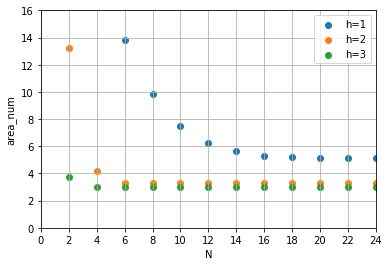

In [7]:
N = [2, 4, 6,  8, 10, 12, 14, 16, 18, 20, 22, 24]
fig, ax = plt.subplots()
ax.grid()
ax.set_xlim(0, 24)
ax.set_ylim(0, 16)
ax.set_xticks(np.linspace(0, 24, 13))
for r in range(3):
    r += 1
    area_num_mean_list = []
    for n in N:
        path = '/Users/oomoriyumehiro/lab/Seminar/mss-python/CSV/size_max2/Segmentation/N8/result_seg_r{0}_N{1}.csv'.format(r, n)
        area_num_mean = 0
        count = 0
        with open(path) as f:
            reader = csv.reader(f)
            for row in reader:
                area_num_mean += area_num(row)
                count += 1
        area_num_mean /= count
        print("N={0}, 領域数平均: {1}".format(n, area_num_mean))
        area_num_mean_list.append(area_num_mean)
    print(area_num_mean_list)
    plt.scatter(N, area_num_mean_list, label = "h={}".format(r))
plt.xlabel("N")
plt.ylabel("area_num")
text_dict = dict(boxstyle = "round", fc = "silver", ec = "mediumblue")
# ax.annotate("5.10", size = 8, color = "black", xy = (24, 6), bbox = text_dict)
# ax.annotate("3.29", size = 8, color = "black", xy = (24, 4), bbox = text_dict)
# ax.annotate("3.02", size = 8, color = "black", xy = (24, 2), bbox = text_dict)
plt.legend()
plt.show()

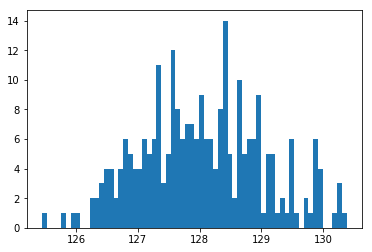

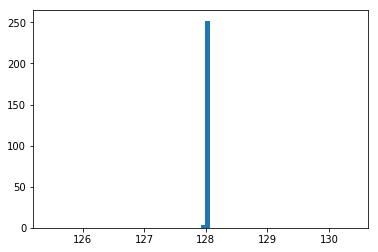

In [8]:
data = [129.76405235, 128.40015721, 128.97873798, 130.2408932 ,
       129.86755799, 127.02272212, 128.95008842, 127.84864279,
       127.89678115, 128.4105985 , 128.14404357, 129.45427351,
       128.76103773, 128.12167502, 128.44386323, 128.33367433,
       129.49407907, 127.79484174, 128.3130677 , 127.14590426,
       125.44701018, 128.6536186 , 128.8644362 , 127.25783498,
       130.26975462, 126.54563433, 128.04575852, 127.81281615,
       129.53277921, 129.46935877, 128.15494743, 128.37816252,
       127.11221425, 126.01920353, 127.65208785, 128.15634897,
       129.23029068, 129.20237985, 127.61267318, 127.69769725,
       126.95144703, 126.57998206, 126.29372981, 129.9507754 ,
       127.49034782, 127.5619257 , 126.74720464, 128.77749036,
       126.38610215, 127.78725972, 127.10453344, 128.3869025 ,
       127.48919486, 126.81936782, 127.97181777, 128.42833187,
       128.06651722, 128.3024719 , 127.36567791, 127.63725883,
       127.32753955, 127.64044684, 127.18685372, 126.2737174 ,
       128.17742614, 127.59821906, 126.36980165, 128.46278226,
       127.09270164, 128.0519454 , 128.72909056, 128.12898291,
       129.13940068, 126.76517418, 128.40234164, 127.31518991,
       127.12920285, 127.42115034, 127.68844747, 128.05616534,
       126.83485016, 128.90082649, 128.46566244, 126.46375631,
       129.48825219, 129.89588918, 129.17877957, 127.82007516,
       126.92924738, 129.05445173, 127.59682305, 129.22244507,
       128.20827498, 128.97663904, 128.3563664 , 128.70657317,
       128.01050002, 129.78587049, 128.12691209, 128.40198936,
       129.8831507 , 126.65224094, 126.729515  , 128.96939671,
       126.82687659, 129.94362119, 127.58638102, 127.25254519,
       129.92294203, 129.48051479, 129.86755896, 128.90604466,
       127.13877431, 129.91006495, 127.73199663, 128.8024564 ,
       128.94725197, 127.84498991, 128.61407937, 128.92220667,
       128.37642553, 126.90059921, 128.29823817, 129.3263859 ,
       127.30543214, 127.85036546, 127.56484645, 129.84926373,
       128.67229476, 128.40746184, 127.23008393, 128.53924919,
       127.32566734, 128.03183056, 127.36415392, 128.67643329,
       128.57659082, 127.79170124, 128.39600671, 126.90693849,
       126.50874241, 128.4393917 , 128.1666735 , 128.63503144,
       130.38314477, 128.94447949, 127.08717777, 129.11701629,
       126.68409259, 127.5384154 , 127.93175839, 129.71334272,
       127.25524518, 127.17356146, 127.90154748, 127.33652171,
       129.12663592, 126.92006849, 126.85253135, 127.56217996,
       127.50196755, 129.92953205, 128.94942081, 128.08755124,
       126.77456448, 128.84436298, 126.99978465, 126.4552289 ,
       129.18802979, 128.31694261, 128.92085882, 128.31872765,
       128.85683061, 127.34897441, 126.96575716, 128.68159452,
       127.19659034, 127.31045022, 127.5444675 , 128.01747916,
       127.64600609, 126.62504871, 127.3563816 , 125.77659685,
       128.62523145, 126.39794234, 126.89561666, 128.05216508,
       127.260437  , 129.5430146 , 126.70714309, 128.26705087,
       127.96071718, 126.8319065 , 128.52327666, 127.82845367,
       128.77179055, 128.82350415, 130.16323595, 129.33652795,
       127.63081816, 127.76062082, 129.0996596 , 128.65526373,
       128.64013153, 126.38304396, 127.97567388, 127.26196909,
       128.2799246 , 127.90184961, 128.91017891, 128.31721822,
       128.78632796, 127.5335809 , 127.05555374, 127.58995031,
       127.98297959, 128.37915174, 130.25930895, 127.95774285,
       127.044055  , 127.65401822, 127.53640403, 128.48148147,
       126.45920299, 128.06326199, 128.15650654, 128.23218104,
       127.40268393, 127.76207827, 126.57593909, 127.50668012,
       127.45713852, 128.41605005, 126.84381757, 128.7811981 ,
       129.49448454, 125.93001497, 128.42625873, 128.67690804,
       127.36256297, 127.60272819, 127.86711942, 127.70220912,
       127.69098703, 126.32399619, 129.15233156, 129.07961859,
       127.18663574, 126.53357567, 128.52106488, 127.42421203,
       128.14195316, 127.68067158, 128.69153875, 128.69474914]
plt.hist(data, bins=64, range=(min(data), max(data)))
plt.show()
res = [128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 127.98989913504226, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0125083299312, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 127.98989913504226, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.0125083299312, 128.0125083299312, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.0125083299312, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.0125083299312, 128.0240170074434, 128.01829532237304, 128.0125083299312, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0125083299312, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0125083299312, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0125083299312, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 127.98989913504226, 128.0240170074434, 128.0125083299312, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.0125083299312, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.0125083299312, 128.0240170074434, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.0125083299312, 128.01829532237304, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434, 127.98989913504226, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.01829532237304, 128.0125083299312, 128.0240170074434, 128.0240170074434, 128.01829532237304, 128.0125083299312, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.01829532237304, 128.0240170074434, 128.0240170074434]
plt.hist(res, bins=64, range=(min(data), max(data)))
plt.show()

9


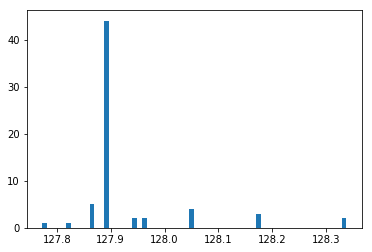

9


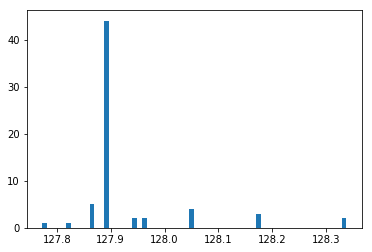

In [25]:
vecY =[128.17800183801273, 127.89313386357246, 127.94072056315801, 128.3378042265133, 128.17800183801273, 127.89313386357246, 127.94072056315801, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 128.0539391683268, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 128.0539391683268, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.77256659624474, 127.89313386357246, 127.89313386357246, 127.89313386357246, 128.3378042265133, 127.86944356271184, 127.89313386357246, 127.89313386357246, 128.0539391683268, 128.0539391683268, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.82168447637149, 127.89313386357246, 127.89313386357246, 127.96486050318003, 127.96486050318003, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.86944356271184, 127.86944356271184, 128.17800183801273, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.86944356271184, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.89313386357246, 127.86944356271184]
vecY_2 = [128.17800183801273, 127.89313386357249, 127.94072056315804, 128.33780422651333, 128.17800183801273, 127.89313386357249, 127.94072056315804, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 128.0539391683268, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 128.0539391683268, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.77256659624473, 127.89313386357249, 127.89313386357249, 127.89313386357249, 128.33780422651333, 127.86944356271184, 127.89313386357249, 127.89313386357249, 128.0539391683268, 128.0539391683268, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.82168447637149, 127.89313386357249, 127.89313386357249, 127.96486050318008, 127.96486050318008, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.86944356271184, 127.86944356271184, 128.17800183801273, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.86944356271184, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.89313386357249, 127.86944356271184]


print(area_num(vecY))
plt.hist(vecY, bins=64)
plt.show()
print(area_num(vecY_2))
plt.hist(vecY_2, bins=64)
plt.show()